In [74]:
# importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [75]:
# importing movies.csv
movies = pd.read_csv(r'/Users/ak261.1/Downloads/ml/movies.csv')
movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [76]:
# importing ratings.csv
ratings = pd.read_csv(r'/Users/ak261.1/Downloads/ml/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [77]:
# Finging average rating of each user
mean = ratings.groupby(by = 'userId', as_index = False)['rating'].mean()
mean.head()

,userId,rating
0,1,4.366379
1,2,3.948276
2,3,2.435897
3,4,3.555556
4,5,3.636364


Text(0.5, 0, 'Ratings')

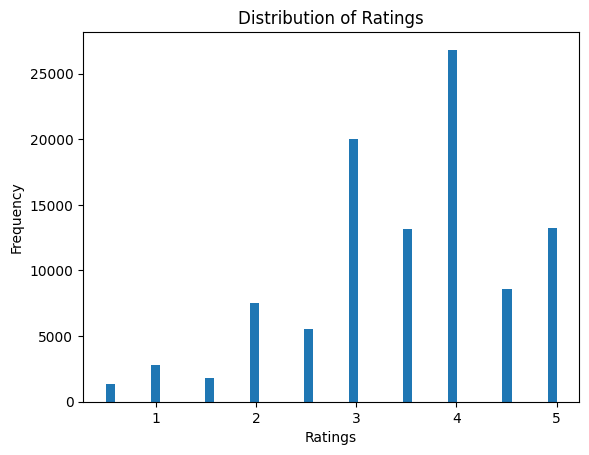

In [78]:
#Plotting graph of ratings
ratings.rating.plot.hist(bins=50)
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')

Text(0.5, 0, 'Average Rating Per User')

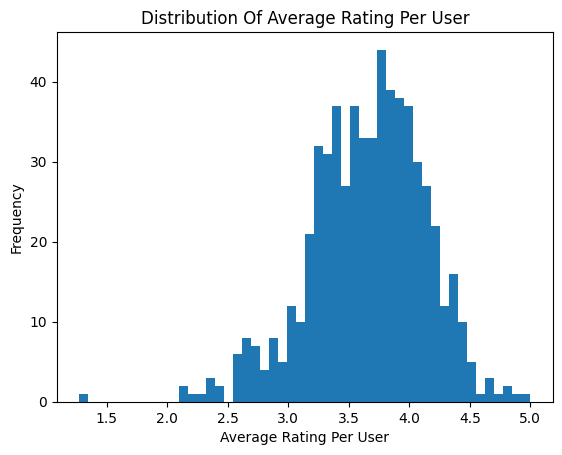

In [79]:
#Plotting graph of mean ratings of users
mean.rating.plot.hist(bins=50)
plt.title('Distribution Of Average Rating Per User')
plt.xlabel('Average Rating Per User')

In [80]:
# Merging ratings and mean
avg_rating = pd.merge(ratings, mean, on='userId')
avg_rating = avg_rating.rename(columns = {'rating_x':'rating','rating_y':'avg_rating'})
avg_rating.head()

,userId,movieId,rating,timestamp,avg_rating
0,1,1,4.0,964982703,4.366379
1,1,3,4.0,964981247,4.366379
2,1,6,4.0,964982224,4.366379
3,1,47,5.0,964983815,4.366379
4,1,50,5.0,964982931,4.366379


In [81]:
# Finding adjusted rating (rating - average rating)
avg_rating['adg_rating'] = avg_rating['rating'] - avg_rating['avg_rating']
avg_rating.head()

,userId,movieId,rating,timestamp,avg_rating,adg_rating
0,1,1,4.0,964982703,4.366379,-0.366379
1,1,3,4.0,964981247,4.366379,-0.366379
2,1,6,4.0,964982224,4.366379,-0.366379
3,1,47,5.0,964983815,4.366379,0.633621
4,1,50,5.0,964982931,4.366379,0.633621


In [82]:
# Creating user-item matrix with ratings
ui_matrix = pd.pivot_table(avg_rating, values = 'rating', index = 'userId', columns = 'movieId')
ui_matrix.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
# Replacing NaN values of each row with average rating of user corresponding to that row
ui_matrix_avg = ui_matrix.apply(lambda row: row.fillna(row.mean()), axis=1)
ui_matrix_avg.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.000000,4.366379,4.000000,4.366379,4.366379,4.000000,4.366379,4.366379,4.366379,4.366379,...,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379
2,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,...,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276
3,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,...,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897
4,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,...,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556
5,4.000000,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,...,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364


In [84]:
# Creating user-item matrix with adjusted ratings
matrix = pd.pivot_table(avg_rating, values = 'adg_rating', index = 'userId', columns = 'movieId')
matrix.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,-0.366379,NaN,-0.366379,NaN,NaN,-0.366379,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.363636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
# Replacing NaN values of each row with average of adjusted ratings of that row
matrix_adj = matrix.apply(lambda row: row.fillna(row.mean()), axis=1)
matrix_adj.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,-3.663793e-01,1.837611e-16,-3.663793e-01,1.837611e-16,1.837611e-16,-3.663793e-01,1.837611e-16,1.837611e-16,1.837611e-16,1.837611e-16,...,1.837611e-16,1.837611e-16,1.837611e-16,1.837611e-16,1.837611e-16,1.837611e-16,1.837611e-16,1.837611e-16,1.837611e-16,1.837611e-16
2,2.143879e-16,2.143879e-16,2.143879e-16,2.143879e-16,2.143879e-16,2.143879e-16,2.143879e-16,2.143879e-16,2.143879e-16,2.143879e-16,...,2.143879e-16,2.143879e-16,2.143879e-16,2.143879e-16,2.143879e-16,2.143879e-16,2.143879e-16,2.143879e-16,2.143879e-16,2.143879e-16
3,1.821904e-16,1.821904e-16,1.821904e-16,1.821904e-16,1.821904e-16,1.821904e-16,1.821904e-16,1.821904e-16,1.821904e-16,1.821904e-16,...,1.821904e-16,1.821904e-16,1.821904e-16,1.821904e-16,1.821904e-16,1.821904e-16,1.821904e-16,1.821904e-16,1.821904e-16,1.821904e-16
4,2.055969e-16,2.055969e-16,2.055969e-16,2.055969e-16,2.055969e-16,2.055969e-16,2.055969e-16,2.055969e-16,2.055969e-16,2.055969e-16,...,2.055969e-16,2.055969e-16,2.055969e-16,2.055969e-16,2.055969e-16,2.055969e-16,2.055969e-16,2.055969e-16,2.055969e-16,2.055969e-16
5,3.636364e-01,1.110223e-16,1.110223e-16,1.110223e-16,1.110223e-16,1.110223e-16,1.110223e-16,1.110223e-16,1.110223e-16,1.110223e-16,...,1.110223e-16,1.110223e-16,1.110223e-16,1.110223e-16,1.110223e-16,1.110223e-16,1.110223e-16,1.110223e-16,1.110223e-16,1.110223e-16


In [86]:
# Similarity Measure : Cosine  Vector Similarity

c = cosine_similarity(ui_matrix_avg)
np.fill_diagonal(c,0)
cosine_sim = pd.DataFrame(c, index = ui_matrix_avg.index)
cosine_sim.columns = ui_matrix_avg.index
cosine_sim.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.999542,0.998167,0.998170,0.999449,0.998593,0.998280,0.999451,0.999264,0.998673,...,0.999553,0.999013,0.994362,0.999346,0.998835,0.997387,0.999035,0.994793,0.999560,0.996034
2,0.999542,0.000000,0.998504,0.998423,0.999780,0.998977,0.998621,0.999755,0.999588,0.999024,...,0.999880,0.999356,0.994741,0.999707,0.999205,0.997707,0.999311,0.994911,0.999899,0.996368
3,0.998167,0.998504,0.000000,0.997026,0.998369,0.997624,0.997253,0.998357,0.998212,0.997647,...,0.998507,0.997963,0.993470,0.998331,0.997827,0.996196,0.997928,0.993479,0.998529,0.995062
4,0.998170,0.998423,0.997026,0.000000,0.998300,0.997575,0.997346,0.998320,0.998133,0.997698,...,0.998417,0.998039,0.993458,0.998244,0.997844,0.996334,0.997901,0.993272,0.998450,0.994899
5,0.999449,0.999780,0.998369,0.998300,0.000000,0.998891,0.998533,0.999657,0.999484,0.998893,...,0.999785,0.999272,0.994689,0.999608,0.999076,0.997630,0.999235,0.994811,0.999815,0.996241


In [87]:
# Similarity measure: Pearson Correlation Coefficient

p = np.corrcoef(ui_matrix_avg)
warnings.filterwarnings("ignore")
np.fill_diagonal(p, 0)
pearson_corr = pd.DataFrame(p, index = ui_matrix_avg.index)
pearson_corr.columns = ui_matrix_avg.index
pearson_corr.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,1.264516e-03,5.525772e-04,0.048419,0.021847,-0.045497,-6.199672e-03,0.047013,1.950985e-02,-8.754088e-03,...,0.018127,-0.017172,-0.015221,-3.705875e-02,-2.912138e-02,0.012016,0.055261,0.075224,-2.571255e-02,0.010932
2,0.001265,0.000000e+00,1.167024e-28,-0.017164,0.021796,-0.021051,-1.111357e-02,-0.048085,-2.438785e-31,3.011629e-03,...,-0.050551,-0.031581,-0.001688,-3.659606e-28,7.177811e-29,0.006226,-0.020504,-0.006001,-6.009100e-02,0.024999
3,0.000553,1.167024e-28,0.000000e+00,-0.011260,-0.031539,0.004800,3.104133e-29,-0.032471,-3.047508e-32,-1.718691e-29,...,-0.004904,-0.016117,0.017749,-2.162426e-29,-1.430628e-03,-0.037289,-0.007789,-0.013001,9.962196e-29,0.019550
4,0.048419,-1.716402e-02,-1.125978e-02,0.000000,-0.029620,0.013956,5.809139e-02,0.002065,-5.873603e-03,5.159032e-02,...,-0.037687,0.063122,0.027640,-1.378212e-02,4.003747e-02,0.020590,0.014628,-0.037569,-1.788358e-02,-0.000995
5,0.021847,2.179571e-02,-3.153892e-02,-0.029620,0.000000,0.009111,1.011715e-02,-0.012284,1.600727e-31,-3.316512e-02,...,0.015964,0.012427,0.027076,1.246135e-02,-3.627206e-02,0.026319,0.031896,-0.001751,9.382892e-02,-0.000278


In [88]:
# Similarity measure: Euclidean Distance

e = euclidean_distances(ui_matrix_avg)
np.fill_diagonal(e,0)
euclidean_dist = pd.DataFrame(e, index = ui_matrix_avg.index)
euclidean_dist.columns = ui_matrix_avg.index
euclidean_dist.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,43.194401,191.187843,83.002410,73.271625,88.304438,113.879811,79.258786,110.004005,108.855897,...,14.170845,97.476482,92.629493,88.596487,115.316206,74.918080,59.815965,125.785393,108.810813,74.590426
2,43.194401,0.000000,149.752648,43.497710,31.704698,47.511412,72.799685,37.724287,68.453624,67.610690,...,47.514732,56.142926,56.193413,46.962041,73.890942,37.732701,21.205691,86.204536,67.058889,40.298468
3,191.187843,149.752648,0.000000,112.842171,119.276961,106.159881,81.049607,113.228702,82.806459,85.224601,...,196.696154,95.911567,112.157981,104.027256,78.403413,123.621593,134.422424,76.711459,83.324799,127.927383
4,83.002410,43.497710,112.842171,0.000000,22.009691,25.040256,40.381204,20.439569,35.924446,35.804134,...,88.101611,27.022610,40.116584,22.039554,40.724143,32.204646,32.468036,55.765098,34.233119,38.742586
5,73.271625,31.704698,119.276961,22.009691,0.000000,21.563681,43.710802,11.134479,38.549896,38.537117,...,78.237726,27.320119,37.996843,18.267173,44.268282,24.946911,20.692508,58.838768,36.734718,32.019395


In [89]:
# Method to find the k nearest neighbours of each user

def k_nearest_neighbours(df,k):
    sort = np.argsort(df.values,axis=1)[:, :k]
    df = df.apply(lambda x: pd.Series(x.sort_values(ascending = False).iloc[:k].index, index = ['top{}'.format(i) for i in range(1, k+1)]), axis=1)
    return df

In [90]:
# Finding 30 nearest neighbours of each user based on Cosine Vector Similarity
cosine_neighbours = k_nearest_neighbours(cosine_sim, 30)
cosine_neighbours.head()

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10,...,top21,top22,top23,top24,top25,top26,top27,top28,top29,top30
userId,,,,,,,,,,,,,,,,,,,,,
1,53,49,515,189,25,251,172,72,123,348,...,194,538,519,300,54,92,400,523,439,60
2,53,189,49,515,25,251,556,348,30,172,...,523,519,60,435,54,459,205,26,595,364
3,441,53,49,515,25,189,251,440,172,30,...,92,538,569,72,231,519,435,459,609,340
4,53,128,581,189,515,49,25,54,251,299,...,87,250,214,507,459,206,194,92,435,521
5,145,35,53,49,189,25,515,251,569,507,...,123,37,348,371,319,538,214,60,194,300


In [91]:
# Finding 30 nearest neighbours for each user based on Pearson Correlation Coefficient
pearson_neighbours = k_nearest_neighbours(pearson_corr, 30)
pearson_neighbours.head()

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10,...,top21,top22,top23,top24,top25,top26,top27,top28,top29,top30
userId,,,,,,,,,,,,,,,,,,,,,
1,301,597,414,477,57,369,206,535,590,418,...,484,469,72,593,44,297,434,483,449,552
2,189,246,378,209,227,326,393,332,196,528,...,114,153,596,495,407,567,93,308,496,222
3,441,496,549,231,527,537,313,518,244,246,...,309,586,230,303,34,161,39,47,127,138
4,75,137,590,391,43,128,462,250,290,85,...,472,593,299,32,349,268,159,199,173,426
5,145,35,565,134,58,444,446,347,530,142,...,94,569,411,588,584,404,498,323,536,437


In [92]:
# Finding 30 nearest neighbours for each user based on Euclidean Distance
euclidean_neighbours = k_nearest_neighbours(euclidean_dist, 30)
euclidean_neighbours.head()

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10,...,top21,top22,top23,top24,top25,top26,top27,top28,top29,top30
userId,,,,,,,,,,,,,,,,,,,,,
1,442,139,508,153,567,298,311,517,308,3,...,36,307,333,535,160,245,149,431,365,217
2,442,139,508,153,567,298,311,517,308,3,...,428,36,333,535,160,245,149,431,365,217
3,53,251,515,25,30,523,348,171,452,43,...,319,601,413,475,188,12,276,154,533,581
4,442,53,139,508,153,567,251,515,25,298,...,22,43,122,371,255,571,19,294,441,297
5,442,139,508,153,567,53,298,311,517,251,...,523,294,297,348,287,307,293,428,36,171


In [93]:
# Finding movieIds of movies rated by each user.
avg_rating = avg_rating.astype({'movieId':str})
rated_movies = avg_rating.groupby(by='userId')['movieId'].apply(lambda x:','.join(x))
rated_movies

userId
1      1,3,6,47,50,70,101,110,151,157,163,216,223,231...
2      318,333,1704,3578,6874,8798,46970,48516,58559,...
3      31,527,647,688,720,849,914,1093,1124,1263,1272...
4      21,32,45,47,52,58,106,125,126,162,171,176,190,...
5      1,21,34,36,39,50,58,110,150,153,232,247,253,26...
                             ...                        
606    1,7,11,15,17,18,19,28,29,32,36,46,47,50,58,68,...
607    1,11,25,34,36,86,110,112,150,153,165,188,204,2...
608    1,2,3,10,16,19,21,24,31,32,34,39,44,47,48,50,6...
609    1,10,110,116,137,150,161,185,208,231,253,288,2...
610    1,6,16,32,47,50,70,95,110,111,112,153,159,194,...
Name: movieId, Length: 610, dtype: object

In [94]:
# Method to return the top 10 recommended movies for the inputted user

def recommend_movies(user, similarity, neighbours):
    movies_seen_by_user = ui_matrix.columns[ui_matrix[ui_matrix.index==user].notna().any()].tolist()
    x = neighbours[neighbours.index==user].values
    y = x.squeeze().tolist()
    z = rated_movies[rated_movies.index.isin(y)]
    l = ','.join(z.values)
    movies_seen_by_neighbours = l.split(',')
    movies_under_consideration = list(set(movies_seen_by_neighbours)-set(list(map(str,movies_seen_by_user))))
    movies_under_consideration = list(map(int,movies_under_consideration))
    score=[]
    for item in movies_under_consideration:
        p = matrix_adj.loc[:,item]
        q = p[p.index.isin(y)]
        r = q[q.notnull()]
        user_avg = mean.loc[mean['userId']==user,'rating'].values[0]
        index = r.index.values.squeeze().tolist()
        weight = similarity.loc[user, index]
        table = pd.concat([r, weight], axis=1)
        table.columns = ['adg_score','weight']
        table['score'] = table.apply(lambda x: x['adg_score']*x['weight'],axis=1)
        numerator = table['score'].sum()
        denomenator = table['weight'].sum()
        final_score = user_avg+(numerator/denomenator)
        score.append(final_score)
    recommendations = pd.DataFrame({'movieId':movies_under_consideration,'score':score})
    top_10_recommendations = recommendations.sort_values(by='score',ascending=False).head(10)
    movie_titles = top_10_recommendations.merge(movies, how='inner', on='movieId')
    movie_titles = movie_titles.title.values.tolist()
    return movie_titles

In [95]:
# Accepting an user id and displaying the top 10 recommended movies using all three similarity measure.

user=int(input("Enter the user id to whom you want to recommend: "))
predicted_movies_cosine = recommend_movies(user, cosine_sim, cosine_neighbours)
predicted_movies_pearson = recommend_movies(user, pearson_corr, pearson_neighbours)
predicted_movies_euclidean = recommend_movies(user, euclidean_dist, euclidean_neighbours)
print()
print("The Recommendations For User Id ",user," using Cosine Vector Similarity :")
print()
for i in predicted_movies_cosine:
    print(i)
print()
print("The Recommendations For User Id ",user," using Pearson Correlation Coefficient :")
print()
for i in predicted_movies_pearson:
    print(i)
print()
print("The Recommendations For User Id ",user," using Euclidean Distance :")
print()
for i in predicted_movies_euclidean:
    print(i)


The Recommendations For User Id  1  using Cosine Vector Similarity :

Shawshank Redemption, The (1994)
Dark Knight, The (2008)
Godfather, The (1972)
Inception (2010)
Interstellar (2014)
Aladdin (1992)
Godfather: Part II, The (1974)
Eternal Sunshine of the Spotless Mind (2004)
How to Train Your Dragon (2010)
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001)

The Recommendations For User Id  1  using Pearson Correlation Coefficient :

Shawshank Redemption, The (1994)
Godfather, The (1972)
Blade Runner (1982)
Casablanca (1942)
2001: A Space Odyssey (1968)
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
Lord of the Rings: The Return of the King, The (2003)
Trainspotting (1996)
Terminator 2: Judgment Day (1991)
Godfather: Part II, The (1974)

The Recommendations For User Id  1  using Euclidean Distance :

Blade Runner (1982)
Donnie Darko (2001)
Eternal Sunshine of the Spotless Mind (2004)
Nightmare Before Christmas, The (1993)
Dark Knight, The (2008)
